In [1]:
# All Requirement Lib Import
import os
import zipfile
import datetime
import splitfolders
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Using Tensorboard as analysis tool
%load_ext tensorboard

In [3]:
# defined classes based on foldering structure, sort by alphabetical
defined_classes = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'NOTHING','O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'
]
print(len(defined_classes))

27


In [4]:
# List path locations
BASE_PATH = './dataset'
BASE_DATASET_PATH = os.path.join(BASE_PATH, 'hand-sign-bisindo')

DATASET_ZIP_PATH = os.path.join(BASE_PATH, 'hand-sign-bisindo-1.zip')

TRAIN_DATASET_PATH = os.path.join(BASE_DATASET_PATH, 'train')
VALIDATION_DATASET_PATH = os.path.join(BASE_DATASET_PATH, 'validation')

In [3]:
with zipfile.ZipFile(DATASET_ZIP_PATH, 'r') as z:
    z.extractall(BASE_DATASET_PATH)

In [5]:
# Split dataset into training, validation, and testing with following ratio 0.9, 0.1, and 0
splitfolders.ratio(BASE_DATASET_PATH, output=BASE_DATASET_PATH, seed=1092, ratio=(0.9, 0.1, 0), group_prefix=None)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(defined_classes), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        TRAIN_DATASET_PATH,
        target_size=(300, 300),
        batch_size=128,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DATASET_PATH, 
        target_size=(300, 300), 
        batch_size=64,
        class_mode='categorical')

Found 1943 images belonging to 27 classes.
Found 215 images belonging to 27 classes.


In [8]:
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [9]:
history = model.fit(
      train_generator, 
      epochs=20,
      verbose=1,
      validation_data=validation_generator,
      callbacks=[tensorboard_callback]
)

Epoch 1/20
16/16 [==============================] - 100s 7s/step - loss: 5.5725 - accuracy: 0.0900 - val_loss: 2.5327 - val_accuracy: 0.4605
Epoch 2/20
16/16 [==============================] - 89s 5s/step - loss: 2.0284 - accuracy: 0.5070 - val_loss: 0.8539 - val_accuracy: 0.7628
Epoch 3/20
16/16 [==============================] - 94s 6s/step - loss: 0.7416 - accuracy: 0.7800 - val_loss: 0.3799 - val_accuracy: 0.8884
Epoch 4/20
16/16 [==============================] - 81s 5s/step - loss: 0.3241 - accuracy: 0.9021 - val_loss: 0.2505 - val_accuracy: 0.9302
Epoch 5/20
16/16 [==============================] - 86s 5s/step - loss: 0.1848 - accuracy: 0.9465 - val_loss: 0.1843 - val_accuracy: 0.9349
Epoch 6/20
16/16 [==============================] - 87s 5s/step - loss: 0.1148 - accuracy: 0.9594 - val_loss: 0.0907 - val_accuracy: 0.9674
Epoch 7/20
16/16 [==============================] - 97s 6s/step - loss: 0.0682 - accuracy: 0.9857 - val_loss: 0.0831 - val_accuracy: 0.9674
Epoch 8/20
16/16 [=

In [11]:
%tensorboard --logdir logs/fit

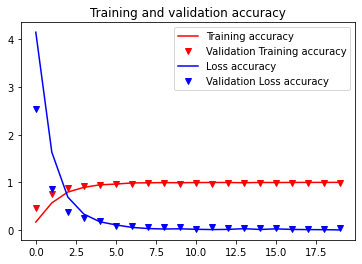

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'rv', label='Validation Training accuracy')
plt.plot(epochs, loss, 'b', label='Loss accuracy')
plt.plot(epochs, val_loss, 'bv', label='Validation Loss accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [39]:
import numpy as np
from keras.preprocessing import image

path = os.path.join(BASE_DATASET_PATH, 'test')
file_name = 'a_2.jpg'
file_path = os.path.join(path, file_name)

img = image.load_img(file_path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

# print(classes[0])
found_class = np.where(classes[0] == 1)[0][0]
print('The Image Shown Sign as :', defined_classes[found_class])

The Image Shown Sign as : A


d:\Capstone\Playground\.env\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


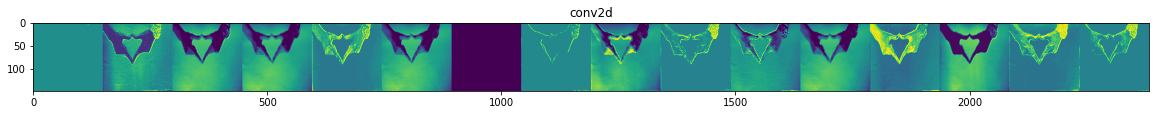

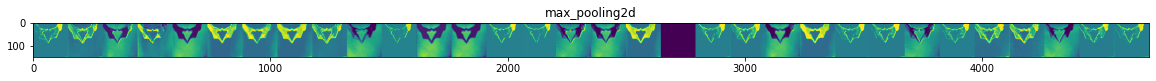

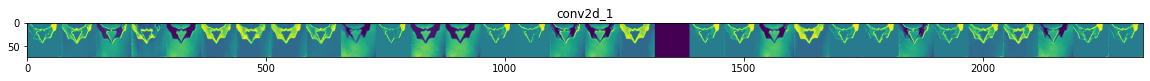

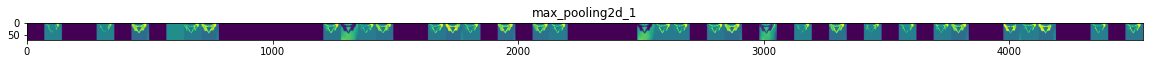

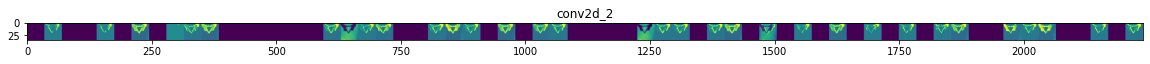

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

train_names = os.listdir(TRAIN_DATASET_PATH)

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img_files = [os.path.join(TRAIN_DATASET_PATH, f) for f in train_names]
img_path = random.choice(img_files)

img = image.load_img(file_path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')